In [2]:
import os
os.chdir("T:/laupodteam/AIOS/Chontira/CellDynClustering")
import pandas as pd
import numpy as np
from data.load_data import *
from sklearn.ensemble import IsolationForest
import matplotlib as plt
from graphic_stuffs import *


dm6_with_labels = pd.read_feather("data/embedded_celldyn_ALL_nn50_ndim6_w_labels_.feather")
others_labels = dm6_with_labels.loc[:,dm6_with_labels.columns.isin(['sex', 'age','study_id', 'analysis_dt', 'sample_dt'])]
dm6 = load_data().set_df(dm6_with_labels.iloc[:, 0:6]).get_x_from_df(contain_y=False)


In [4]:
def plot_multi_scatter_outliers(data,outliers, row, col, subsample = False):

    plot_df = data
    if(type(subsample)==int):
        plot_df = plot_df.sample(subsample)

    fig, ax = plt.subplots(row,col,figsize = (30,50))
    i,j = 0,0
 
    for colx in plot_df:
        for coly in plot_df:
            ax[i,j].scatter(plot_df[colx],plot_df[coly], s = 1, c = "grey",alpha = 0.2)
            ax[i,j].scatter(plot_df.loc[outliers,plot_df.columns == colx],plot_df.loc[outliers,plot_df.columns == coly], s = 5,c='red', alpha = 0.2)
            i = i+1 if j == col-1 else i
            j = j+1 if j < col-1 else 0

def plot_scatter_outliers(data,x,y,outliers, subsample = False):

    plot_df = data
    
    if(type(subsample)==int):
        plot_df = plot_df.sample(subsample)

    plt.scatter(plot_df[x],plot_df[y], s=50, linewidth=0, c='gray', alpha=0.25)
    plt.scatter(plot_df.loc[outliers,plot_df.columns == x],plot_df.loc[outliers,plot_df.columns == y], s=50, linewidth=0, c='red', alpha=0.5)


In [12]:
detector = IsolationForest(contamination =  0.001).fit(dm6.df)
predicted = detector.predict(dm6.df)


c:\Users\cchumsae\Anaconda3\envs\CellDynCluster\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
print(np.unique(predicted, return_counts=True))

(array([-1,  1]), array([   2734, 3091058], dtype=int64))


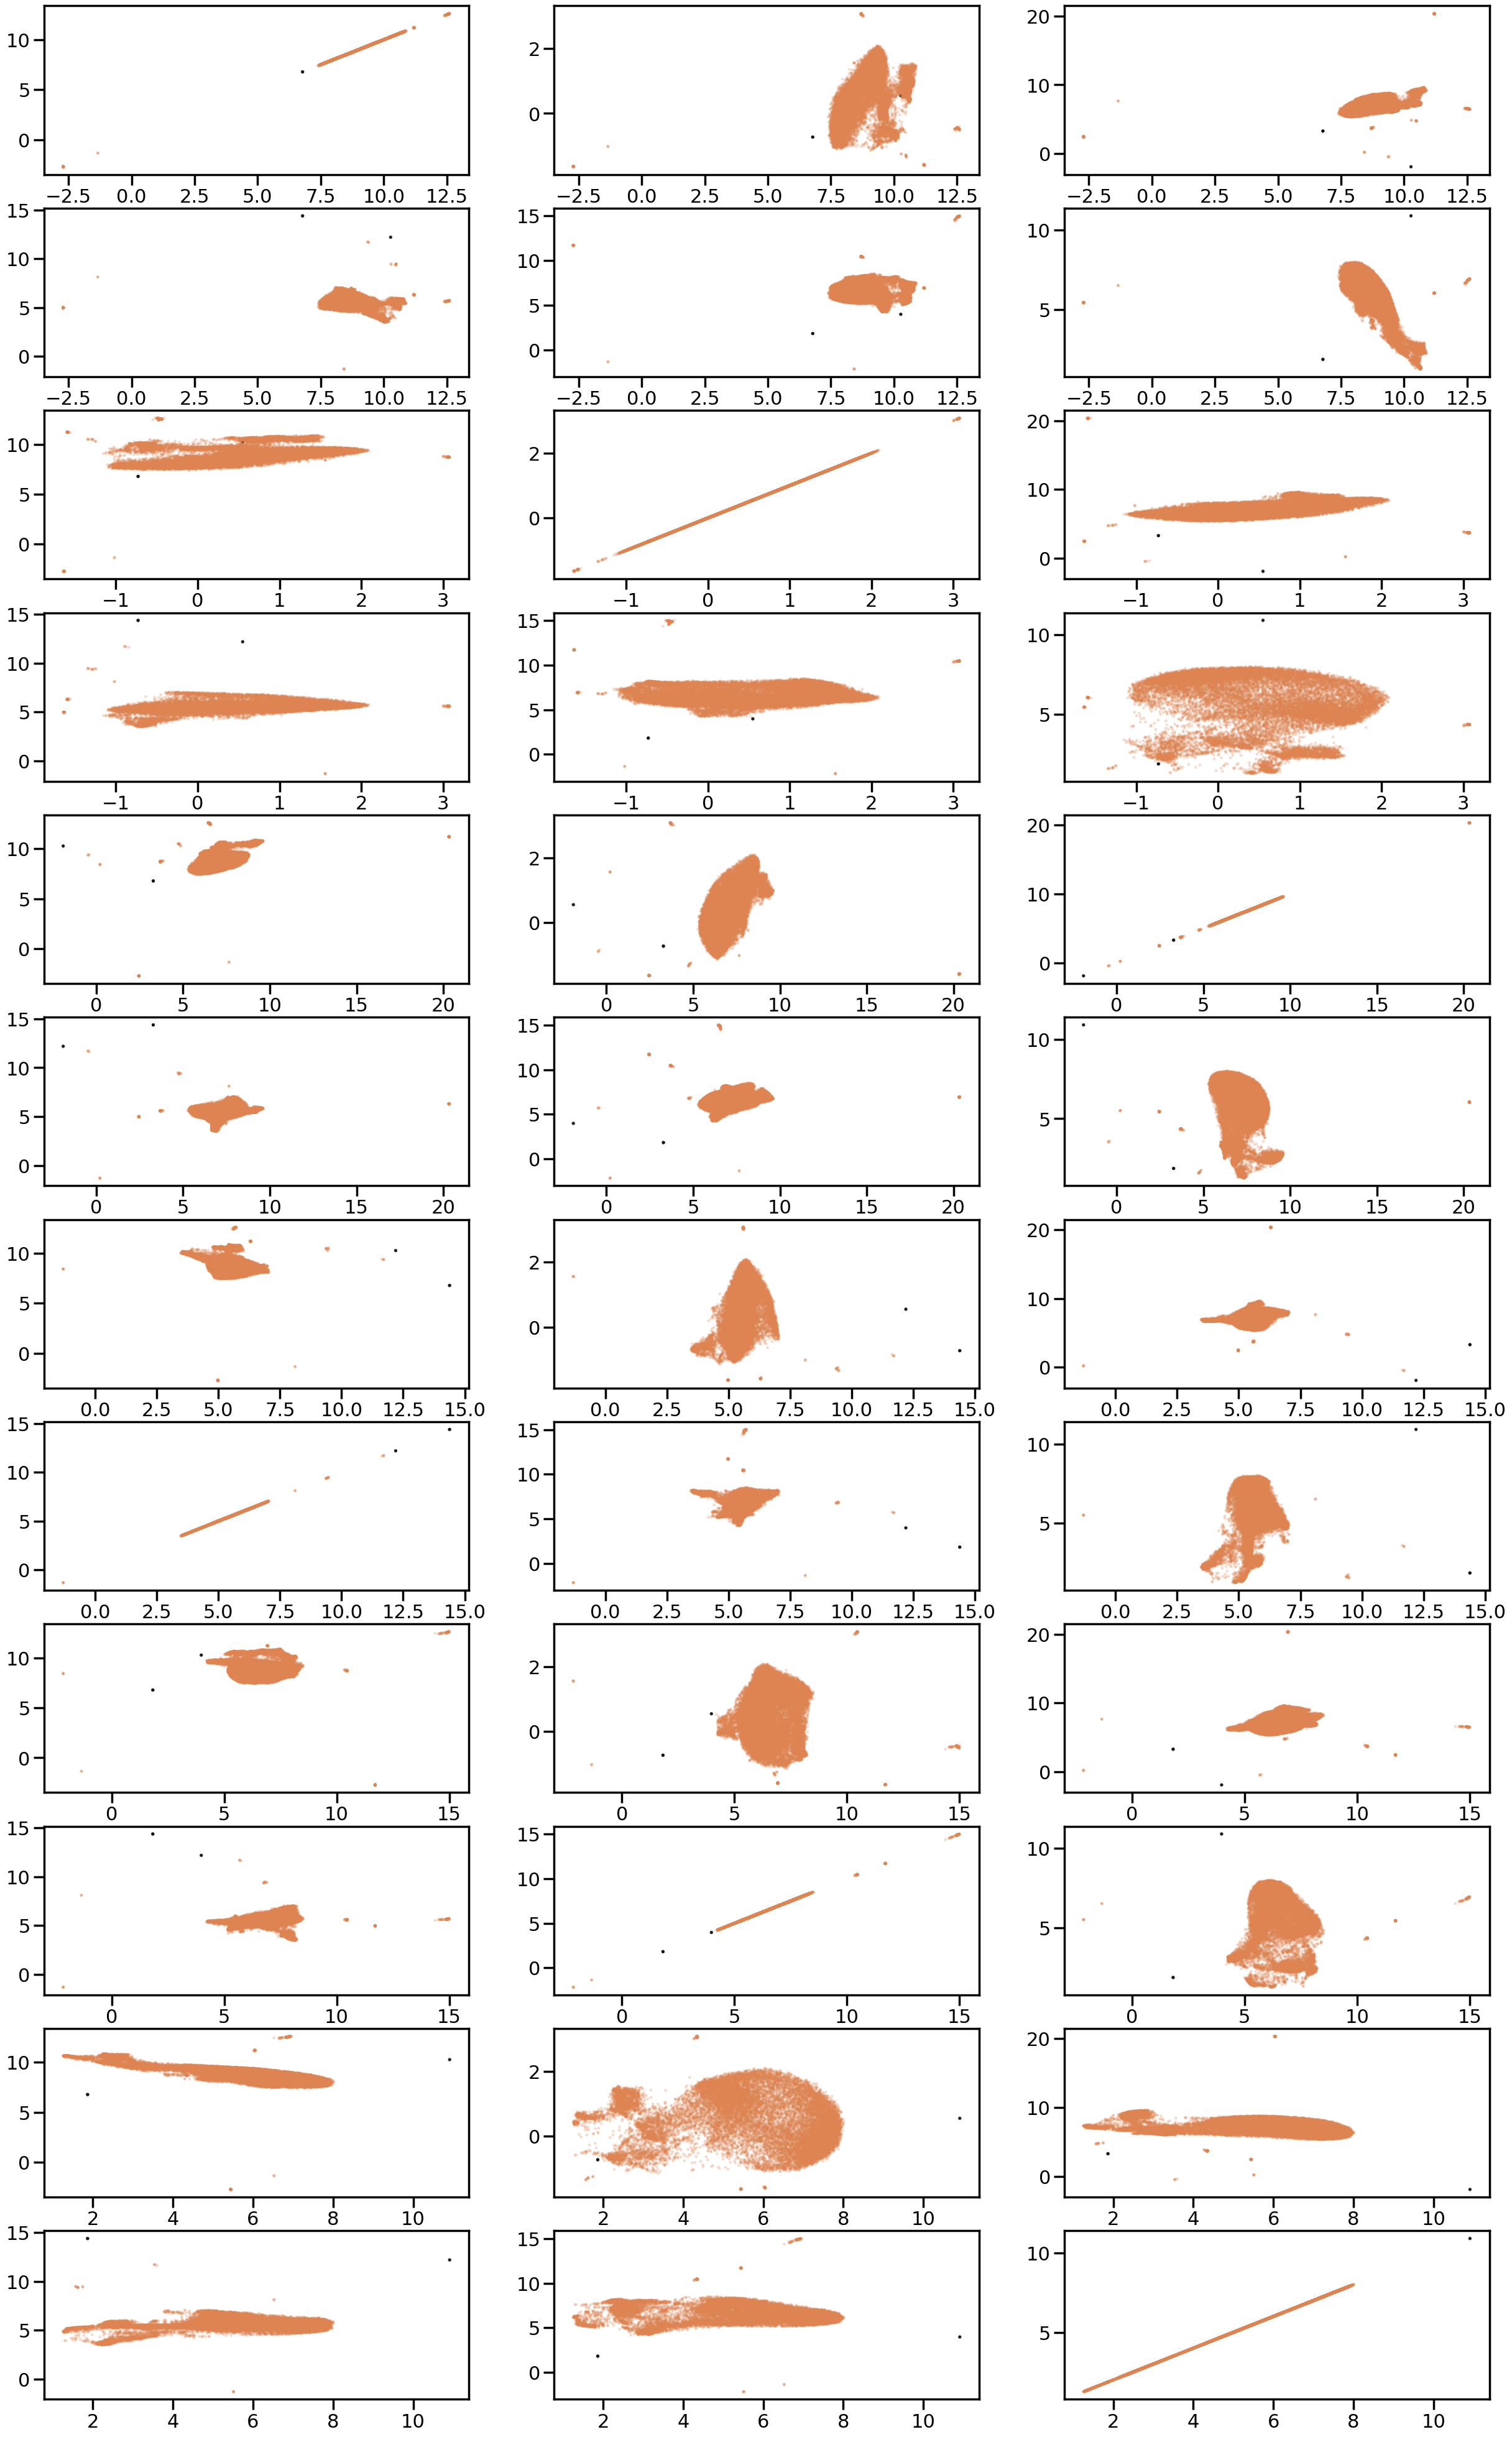

In [14]:
plot_multi_scatter_with_labels(dm6.df,predicted, 12, 3, subsample=20000,remove_noise=False)


In [9]:
dm6.df.iloc[dm6.df[predicted == 1].index, :]

predicted[[1,4,5]]

array([1, 1, 1])